# This is a Jupyter Notebook – `*.ipynb`

[Jupyter Notebooks](http://jupyter.org/) are an emerging format for sharing scientific calculations in a standardized document.
It is made up of a list of input-cells (usually containing code) and corresponding output cells (containing text and/or graphics).
There are also "Markdown" cells, like the one you're reading right now, containing formatted text to explain the content.

## Usage

To **evaluate a cell**, select the input cell (click on it, or put the cursor inside of it), and either press the play-button in the button row or press the `Shift`+`Return` keys.
Usually, you should be able to go through a full notebook by pressing `Shift`+`Return` for evaluating one cell after another.
Try it here after reading this introduction!

Each Jupyter Notebook has a corresponding **"Kernel"**.
It defines the language and back-end you are using when running code in a cell.
Look at the top right, there it tells you what the current one is!

In the menu, you can select the "Kernel" you want to use.
For this notebook here, it needs to be Python 3 by Anaconda.

CoCalc supports the following kernels:

* [Python](https://www.python.org/) -- version 2 and 3.
* [Anaconda Python](https://www.anaconda.com/what-is-anaconda/)
* [SageMath](https://www.sagemath.org/)  -- [Tutorial](http://doc.sagemath.org/html/en/tutorial/index.html)
* [Julia](https://julialang.org/)
* [R](https://cran.r-project.org)  -- [Getting Started](https://cran.r-project.org/doc/contrib/Lemon-kickstart/)
* [Octave](https://www.gnu.org/software/octave/)
* and many more ...

## CoCalc Jupyter Notebooks

Our Jupyter notebooks are an enhanced version of the legacy implementation.
In addition to the standard features, we offer concurrent editing (Google Docs style), integrated chat, detailed revision history, and a faster more scalable interface.

## Classical Jupyter Notebook

As an backwards compatible alternative to CoCalc's Jupyter Notebook implementation,
there is also an enhanced version of the classical Jupyter Notebook available.
It offers all original functionalities, but has a few technical drawbacks.
Use it when you require full support of the legacy system.

---

Read [this overview](https://github.com/sagemathinc/cocalc/wiki/JupyterClassicModern) for more information!



In [35]:
import pandas as pd

# Load the dataset
data = pd.read_csv('housepriceprediction.csv')

# Display the first few rows
print(data.head())


   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


# Check for missing values
print(data.isnull().sum())



## Simple calculations

In [36]:
# Display basic statistics of the dataset
print(data.describe())


             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers  
count  128.000000  
mean     2.578125  
std      1.069324  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  


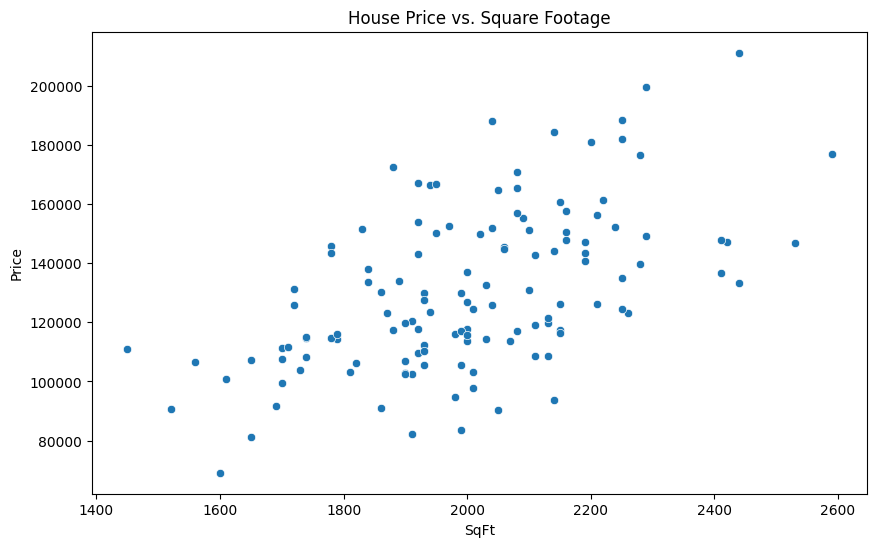

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='SqFt', y='Price', data=data)
plt.title('House Price vs. Square Footage')
plt.show()


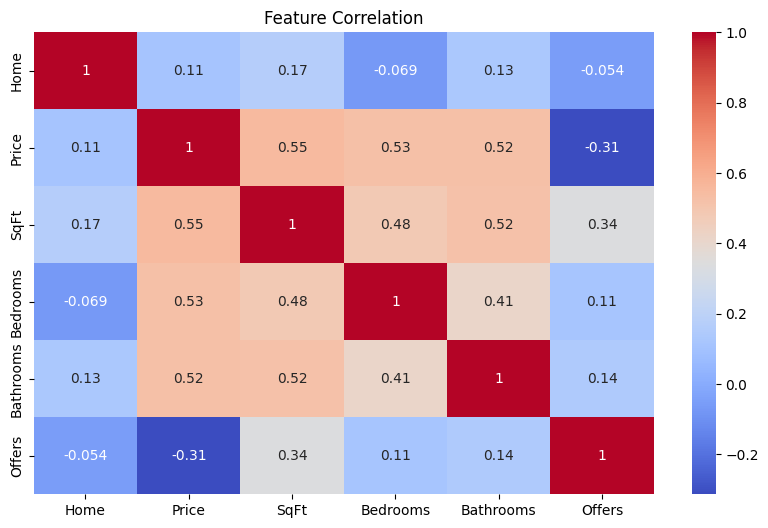

In [50]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now generate the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [51]:
# Convert 'Brick' to numeric: Yes = 1, No = 0
data['Brick'] = data['Brick'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encoding for 'Neighborhood'
data = pd.get_dummies(data, columns=['Neighborhood'], drop_first=True)

print(data.head())


   Home   Price  SqFt  Bedrooms  Bathrooms  Offers  Brick  Neighborhood_North  \
0     1  114300  1790         2          2       2      0               False   
1     2  114200  2030         4          2       3      0               False   
2     3  114800  1740         3          2       1      0               False   
3     4   94700  1980         3          2       3      0               False   
4     5  119800  2130         3          3       3      0               False   

   Neighborhood_West  
0              False  
1              False  
2              False  
3              False  
4              False  


In [52]:
# Features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dot-product $\vec{x} \cdot \vec{y}$

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Plotting

Familiarize yourself with the excellent [matplotlib](https://matplotlib.org/) library.

In [55]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LinearRegression()

Defining a vector $u$ for the x-values and calculating a corresponding vector $v$ for the y-values.

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 114251135.71732575
R-squared: 0.8061565137761025


First 4 values of u and v as (x, y)-coordinates:

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree MSE: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')


Decision Tree MSE: 437704230.7692308
Decision Tree R-squared: 0.25737181083977223


Now, we plot a grid and draw a line through all corresponding x and y values.

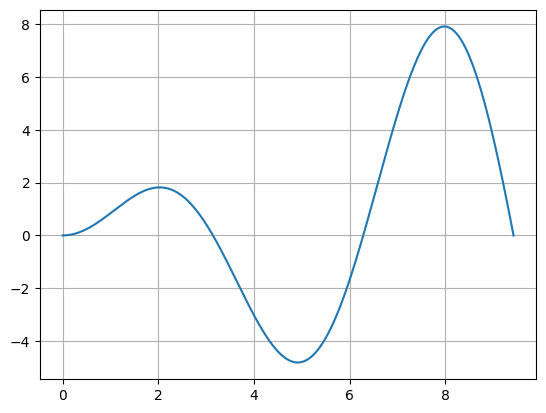

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


## Programming in Python